# yfinance Scratchpad

In [1]:
import yfinance as yf

In [2]:
msft = yf.Ticker("MSFT")

# get stock info
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, and OneDrive; LinkedIn that includes Talent, Learning, Sales, and Marketing solutions, as well as premium subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consu

In [ ]:
# show splits
msft.splits

In [ ]:
# show actions (dividends, splits)
msft.actions

In [3]:
# get historical market data
hist = msft.history(period="max")

In [4]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.06,0.06,0.06,0.06,1031788800,0.0,0.0
1986-03-14,0.06,0.07,0.06,0.06,308160000,0.0,0.0
1986-03-17,0.06,0.07,0.06,0.07,133171200,0.0,0.0
1986-03-18,0.07,0.07,0.06,0.06,67766400,0.0,0.0
1986-03-19,0.06,0.06,0.06,0.06,47894400,0.0,0.0


In [5]:
hist2=hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
hist2.head()

,Close
Date,
1986-03-13,0.06
1986-03-14,0.06
1986-03-17,0.07
1986-03-18,0.06
1986-03-19,0.06


In [6]:
hist3=hist2.sort_values('Date')
hist3=hist3.pct_change().dropna()
hist3=hist3.reset_index()
hist3.head()

,Date,Close
0,1986-03-14,0.000000
1,1986-03-17,0.166667
2,1986-03-18,-0.142857
3,1986-03-19,0.000000
4,1986-03-20,0.000000


In [7]:
hist3.rename(columns={'Close': 'dly_rtn'}, inplace=True)
hist3.head()

,Date,dly_rtn
0,1986-03-14,0.000000
1,1986-03-17,0.166667
2,1986-03-18,-0.142857
3,1986-03-19,0.000000
4,1986-03-20,0.000000


In [8]:
hist3['shift7']=hist3.dly_rtn.shift(7)
hist3['shift14']=hist3.dly_rtn.shift(14)
hist3['shift28']=hist3.dly_rtn.shift(28)
hist3.dropna(inplace=True)
hist3.head()

,Date,dly_rtn,shift7,shift14,shift28
28,1986-04-24,0.166667,0.000000,0.0,0.000000
29,1986-04-25,0.000000,0.166667,0.0,0.166667
30,1986-04-28,0.142857,0.000000,0.0,-0.142857
31,1986-04-29,-0.125000,-0.142857,0.0,0.000000
32,1986-04-30,0.000000,0.000000,0.0,0.000000


In [48]:
df=hist3.drop(columns='Date')
target_name=df.columns[0]
y=df[target_name]
X=df.drop(columns=target_name)

In [106]:
X.head()

,shift7,shift14,shift28
28,0.000000,0.0,0.000000
29,0.166667,0.0,0.166667
30,0.000000,0.0,-0.142857
31,-0.142857,0.0,0.000000
32,0.000000,0.0,0.000000


In [117]:
X2=X[0:4]
X2.replace([28],[5])
X2

,shift7,shift14,shift28
28,0.000000,0.0,0.000000
29,0.166667,0.0,0.166667
30,0.000000,0.0,-0.142857
31,-0.142857,0.0,0.000000


In [118]:
hysteresis=X2[:1]
hysteresis

,shift7,shift14,shift28
28,0.0,0.0,0.0


In [119]:
X_shift=X2.shift(1)
X_shift

,shift7,shift14,shift28
28,NaN,NaN,NaN
29,0.000000,0.0,0.000000
30,0.166667,0.0,0.166667
31,0.000000,0.0,-0.142857


In [120]:
X_shift[:1]=hysteresis
X_shift

,shift7,shift14,shift28
28,0.000000,0.0,0.000000
29,0.000000,0.0,0.000000
30,0.166667,0.0,0.166667
31,0.000000,0.0,-0.142857


In [50]:
df.head()

,dly_rtn,shift7,shift14,shift28
28,0.166667,0.000000,0.0,0.000000
29,0.000000,0.166667,0.0,0.166667
30,0.142857,0.000000,0.0,-0.142857
31,-0.125000,-0.142857,0.0,0.000000
32,0.000000,0.000000,0.0,0.000000


# Lasso Regression Option 1

In [31]:
#Option1
#https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

In [22]:
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=31)

In [23]:
#Scale the data as linear models
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler()

In [30]:
#Create the Lasso Regression Model
from sklearn.linear_model import Lasso
import numpy as np
lasso_model = Lasso(alpha=.00000001, normalize=True)
lasso_model.fit(X_train,y_train)
train_score=lasso_model.score(X_train,y_train)
test_score=lasso_model.score(X_test,y_test)
lasso_coef = np.sum(lasso_model.coef_!=0)

In [31]:
print(f'training score: {train_score}')
print(f'test score: {test_score}')
print(f'number of features used: {lasso_coef}')

training score: 0.0028967431990326586
test score: -0.006503490158229708
number of features used: 3


In [38]:
X.head()

,shift7,shift14,shift28
28,0.000000,0.0,0.000000
29,0.166667,0.0,0.166667
30,0.000000,0.0,-0.142857
31,-0.142857,0.0,0.000000
32,0.000000,0.0,0.000000


In [46]:
lasso_coef = 3

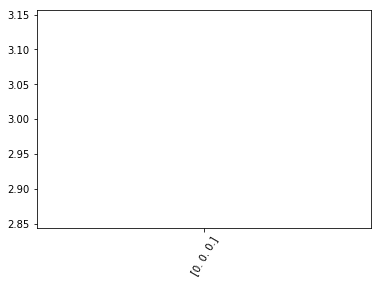

In [50]:
# Plot the coefficients
plt.plot(range(0,1), lasso_coef)
plt.xticks(range(0,1), X.values, rotation=60)
plt.margins(0.02)
plt.show()

# Monte_Carlo Option 2 
## Lasso Regression using LogisticRegression Model
https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499

In [167]:
# input dataframe with at least 2 columns: 
## first column: daily closing price
## second+ column: daily sentiment analysis
# input number of iterations (days to shift sentiment analysis)
#
# output:
## Feature: column name of best feature
## coef: coef of best feature
## days_shift: number of days shifted for best correlation

def sent_monte_carlo_2 (df, iterations):
    #Instantiate libraries
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import Lasso, LogisticRegression
    from sklearn.feature_selection import SelectFromModel
    import numpy as np  
    
    #Create empty list to store coefficients
    coef_list = []
    #Create empty list to store max features
    feat_list = []

 
    #Seperate the Features (X) from the Target (y)
    target_name=df.columns[0]
    y=df[target_name]
    X=df.drop(columns=target_name)
    
    for x in range(0, iterations):
        #Split data into training and testing data
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                            y, 
                                                            test_size=0.3,
                                                            random_state=0)
                
        #Scale the data as linear models
        scaler = StandardScaler()
        scaler.fit(X_train.fillna(0))

        #Run Lasso Regression (LogisticRegression using Lasso (L1) penatly)
        #Select features using the selectFromModel
        lasso_model = LogisticRegression(C=1, class_weight=None, dual=False,
                                         fit_intercept=True, intercept_scaling=1,
                                         max_iter=100, multi_class='ovr', n_jobs=1,
                                         penalty='l1', random_state=None, solver='liblinear', 
                                         tol=0.0001, verbose=0, warm_start=False)
        sel_=SelectFromModel(estimator=lasso_model, prefit=False, threshold=None)
        
        #Convert y_train into a category by representing day-to-day return increases as 1 and decreases as 0
        y_train_shift=y_train.shift(1)
        y_train_shift[:1]=0
        y_train_cat=np.where(y_train_shift>y_train,0,1)
        
        #Fit the model
        sel_.fit(scaler.transform(X_train.fillna(0)), y_train_cat)         
        
        #Store features that were selected
        selected_feat = X_train.columns[(sel_.get_support())]
        num_selected_feat = len(selected_feat)
        num_total_feat = X_train.shape[1]
        
        #if no featuers were selected, append error values to coef_list and feat_list
        #else, append max coefficient and column name for best coefficient
        if (num_selected_feat == 0):
            print(f'No features selected for days shift {x}')
            #Append error max coefficient
            coef_list.append(-999)
            #Append error column name to feature list
            feat_list.append(-999)
        else:
            #Grab coefficient per feature
            lasso_coef = sel_.estimator_.coef_
            #Calculate and append max coefficient
            coef_list.append(max(lasso_coef[0]))
            #Grab index of max coefficient
            indx=np.argmax(lasso_coef)
            #Append column name to feature list
            feat_list.append(X.columns[indx])

        #Shift features by 1 day
        hysteresis=X[:1]
        X=X.shift(1)
        X[:1]=hysteresis

    #save max coefficient from monte carlo
    coef_max=max(coef_list) 
    #save index of max coefficient...this is equal to the number of days shifted
    days_shift=np.argmax(coef_list)
    #grab column name of feature with the best overall max coefficient
    feature =feat_list[days_shift]
    
    print(f'Monte Carlo Sentiment Analysis Results:')
    print(f'Number of iterations: {iterations}')
    print(f'Best feature:         {feature}')
    print(f'Best coefficient:     {coef_max}')
    print(f'Days Shifted:         {days_shift}')
    
    return feature, coef_max, days_shift, coef_list, feat_list

In [151]:
df=hist3.drop(columns='Date')

In [168]:
f, c_m, s, c_l, f_l = sent_monte_carlo_2(df, 20)

Monte Carlo Sentiment Analysis Results:
Number of iterations: 20
Best feature:         shift28
Best coefficient:     0.05990965606085851
Days Shifted:         8


In [169]:
winner=df[f].shift(s)

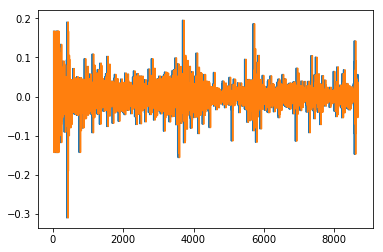

In [170]:
# Plot the daily returns and best feature
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(winner)
plt.show()

In [160]:
target_name=df.columns[0]
y=df[target_name]
X=df.drop(columns=target_name)

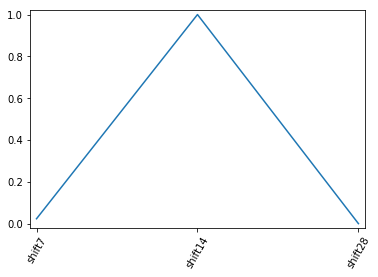

In [161]:
# Plot the coefficients
import matplotlib.pyplot as plt
plt.plot(range(len(X.columns)), lasso_coef[0])
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [85]:
s=1000

In [86]:
winner=X[f].shift(s)
winner.tail()

8668    0.006840
8669    0.007360
8670    0.009929
8671    0.001855
8672    0.002407
Name: shift7, dtype: float64

In [82]:
f='shift7'

In [ ]:
f, c, s = monte_carlo(df)

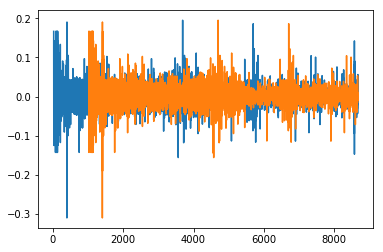

In [88]:
# Plot the coefficients
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(winner)
# plt.xticks(range(len(X)), X.values, rotation=60)
# plt.margins(0.02)
plt.show()

In [54]:
print(range(len(df.columns)))

range(0, 4)


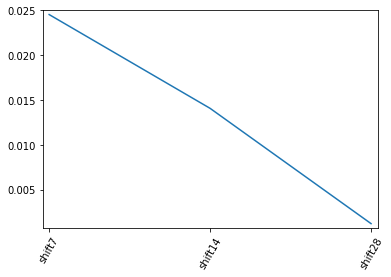

In [59]:
# Plot the coefficients
import matplotlib.pyplot as plt
plt.plot(range(len(X.columns)), lasso_coef[0])
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [ ]:
#check for accuracy
#Confusion matrix


#RMSE - Regression Model

# From Metin

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4,normalize=True)
# Fit the regressor to the data
lasso.fit(X,y)
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

# Decision Tree Regression with AdaBoost

In [72]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [81]:
X2=X['shift7']
X2.head()

28    0.000000
29    0.166667
30    0.000000
31   -0.142857
32    0.000000
Name: shift7, dtype: float64

In [82]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=0)

regr_1.fit(X2, y)
regr_2.fit(X2, y)

# Predict
y_1 = regr_1.predict(X2)
y_2 = regr_2.predict(X2)

# Plot the results
plt.figure()
plt.scatter(X2, y, c="k", label="training samples")
plt.plot(X2, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X2, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.          0.16666667  0.         ...  0.01266766 -0.00897719
  0.01009801].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.